<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/galaxy_NGC_266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Galaxy NGC 266**

[NGC 266 Galaxy](https://en.m.wikipedia.org/wiki/NGC_266) is a massive barred spiral galaxy in the constellation Pisces. NGC 266 is located at a distance of 197 megalight-years from the Milky Way.

![sciences](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/N266s.jpg/1024px-N266s.jpg)




In [ ]:
!pip install astropy astroquery -q
from astroquery.ipac.irsa import Irsa
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib inline

*Load data with FITS via IRSA (start with name, then get coordinates and FITS)*

In [ ]:
# Define object (Galaxy name)
object_name = 'NGC 266'

In [ ]:
# Get skycoordinates of desired object
galaxy = Simbad.query_object(object_name)
ra_hms = galaxy['RA'][0]
dec_dms = galaxy['DEC'][0]
print(galaxy)

 MAIN_ID        RA           DEC      ... COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                                                    
--------- ------------- ------------- ... -------------- ------------------- ----------------
NGC   266 00 49 47.8149 +32 16 39.786 ...              O 2020yCat.1350....0G                1


In [ ]:
print("RA (h:m:s):", ra_hms)
print("DEC (d:m:s):", dec_dms)

RA (h:m:s): 00 49 47.8149
DEC (d:m:s): +32 16 39.786


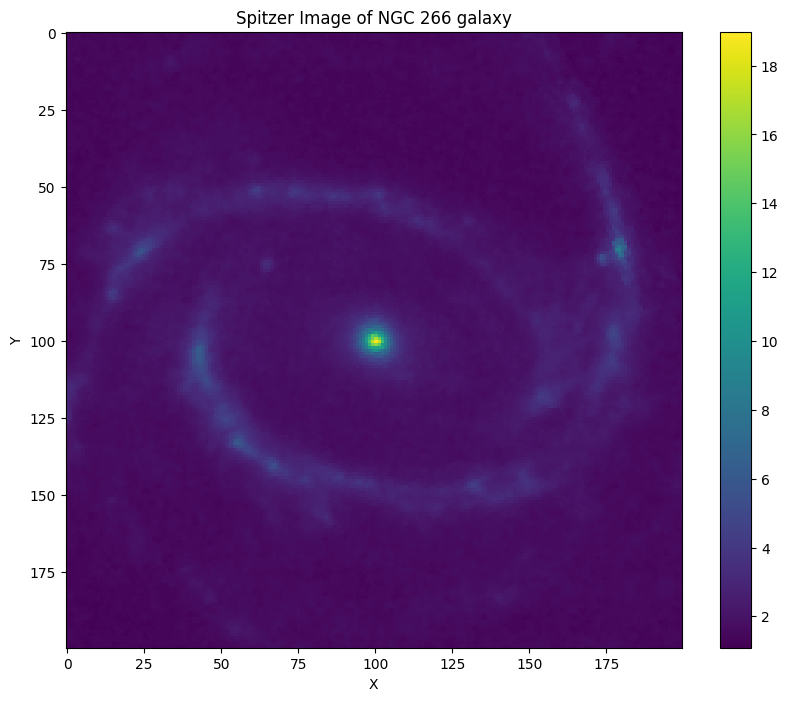

In [ ]:
# Simple image access queries from IRSA for galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][0]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='viridis')
plt.colorbar()
plt.title(f'Spitzer Image of {object_name} galaxy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

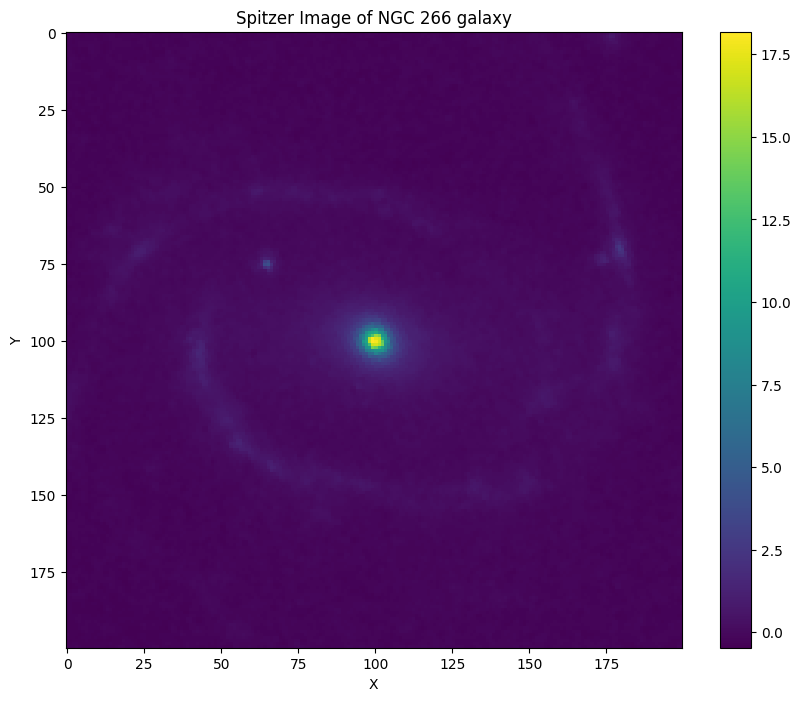

In [ ]:
# Simple image access queries from IRSA for M31 galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][1]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='viridis')
plt.colorbar()
plt.title(f'Spitzer Image of {object_name} galaxy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

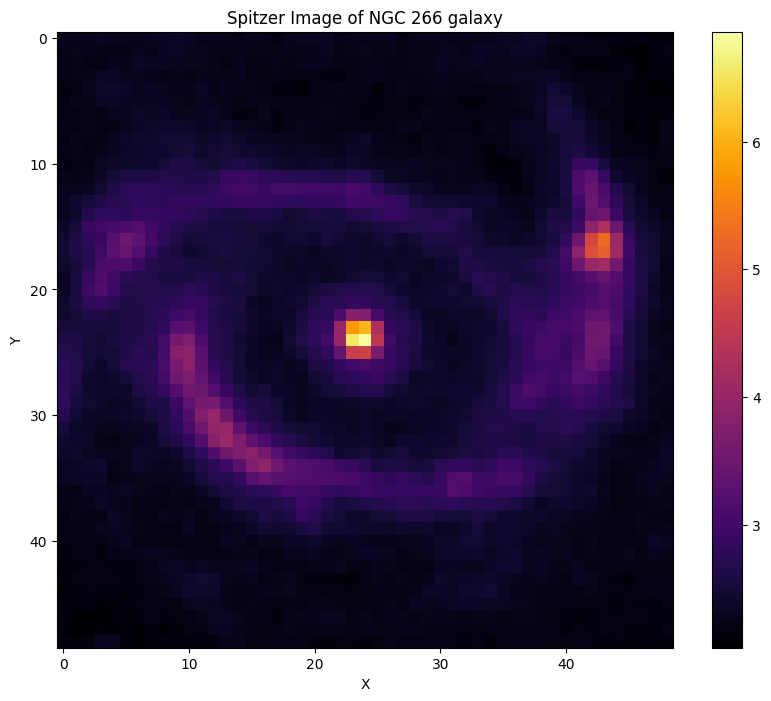

In [ ]:
# Simple image access queries from IRSA for M31 galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][8]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='inferno')
plt.colorbar()
plt.title(f'Spitzer Image of {object_name} galaxy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

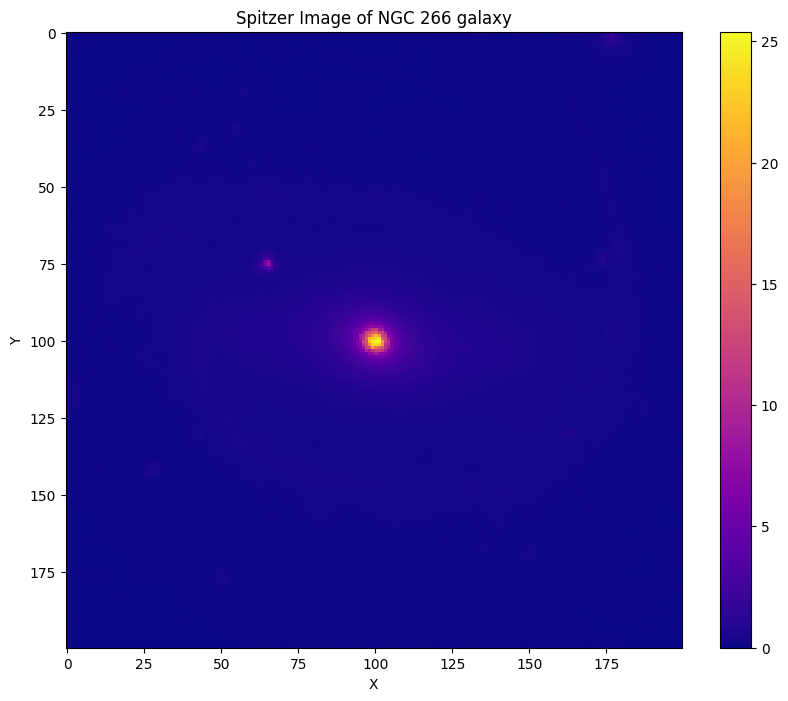

In [ ]:
# Simple image access queries from IRSA for M31 galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][7]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='plasma')
plt.colorbar()
plt.title(f'Spitzer Image of {object_name} galaxy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# How many science picture are therein spitzer_images?
science_images_count = len(spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'])
print("Number of science images:", science_images_count)

Number of science images: 10


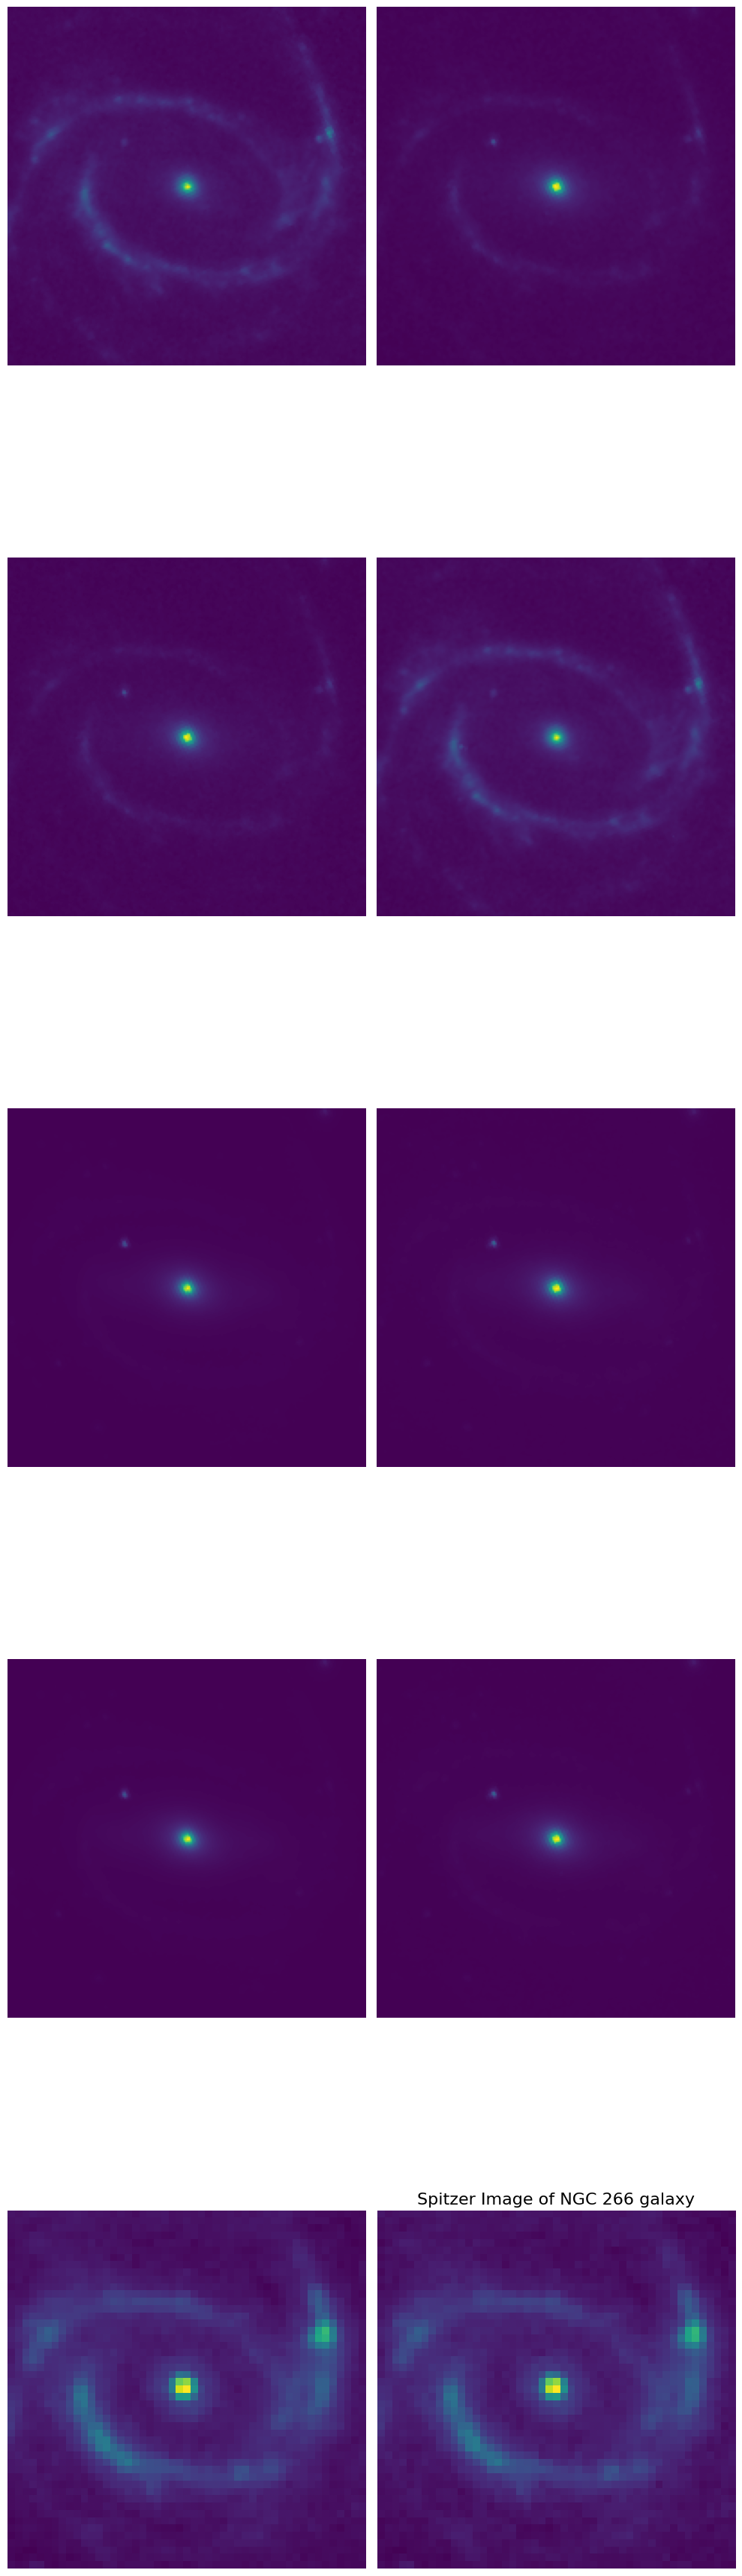

In [ ]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.io import fits
import astropy.units as u
from astroquery.irsa import Irsa
from astropy.coordinates import SkyCoord

# Simple image access queries from IRSA for M31 galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Filter for science images only
science_images = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science']

# Set up the figure for a 16x2 grid (2 images per row, 16 rows)
fig, axes = plt.subplots(5, 2, figsize=(10, 40))  # Adjust figsize for clarity

# Loop through each of the 14 science images of the total 32 images
for i in range(10):
    # Access each science image URL
    science_image = science_images[i]
    with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
        cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

    # Plot the cutout in the grid
    ax = axes[i // 2, i % 2]  # Calculate row and column for 2 images per row
    ax.imshow(cutout.data, cmap='viridis')
    ax.axis('off')  # Hide axes for clarity

plt.title(f'Spitzer Image of {object_name} galaxy', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()


**Get more details about the file**

In [ ]:
hdul = fits.open(science_image['access_url'], use_fsspec=True)

In [ ]:
# Print the file information
hdul.info()

Filename: <class 'fsspec.implementations.http.HTTPFile'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      77   (564, 774)   float32   


In [ ]:
#  Access the primary HDU (Header/Data Unit) to get the data
primary_hdu = hdul[0]
data = primary_hdu.data
print(primary_hdu.header) # Display the header to learn more about the file
print(repr(hdul[0].header))  # Science data HDU header

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel - floating point                NAXIS   =                    2 / Number of axes                                 NAXIS1  =                  564 / X axis length                                  NAXIS2  =                  774 / Y axis length                                  ORIGIN  = 'Spitzer Super-Mosaic Pipeline' / Origin of these image data          CREATOR = 'Spitzer Science Center' / Creator of this FITS file                                                                                                            / TIME AND EXPOSURE INFORMATION                                                                                                                       TELESCOP= 'Spitzer '           / Name of Telescope                              INSTRUME= 'MIPS    '           / Name of Instrument                             CHNLNUM =                    1 / Instrum

In [ ]:
# Close the FITS file
hdul.close()